### Analyzing the Stroop Effect

(1) What is the independent variable? What is the dependent variable?

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm
pd.options.mode.chained_assignment = None
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [2]:
# Load CSV files with stroop data into Pandas dataframe and view the first 5 rows
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
# View shape of dataframe
df.shape

(24, 2)

* The dependent variable is whether the response is congruent or incongruent. The independent variable is the response time.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

The null (**$H_{0}$**) hypothesis is that there is no difference in response time between congruent and incongruent values.

* **$H_{0}$**: **$\mu_{c}$** - **$\mu_{i}$** **$\leq$** 0  

The alternative (**$H_{1}$**)hypothesis is that there is a longer response time for incongruent values versus congruent values.

* **$H_{1}$**: **$\mu_{c}$** - **$\mu_{i}$** **$>$** 0 

An Ordinary Least Squares(OLS) statistical test test can be used to predict whether there are differences in response time between the congruent and incongruent groups using an intercept. The OLS test assumes a linear relationship exists between the dependent and inpendent variables.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [4]:
# View descriptive statistics of dataframe
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


* Sample Size - 24
Mean response time - 14 seconds(congruent) 22 seconds(incogruent)
Standard deviation - 3.56(congruent) 4.80(incogruent)
75th percentile - 16.20(congruent) 24.05(incongruent)

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

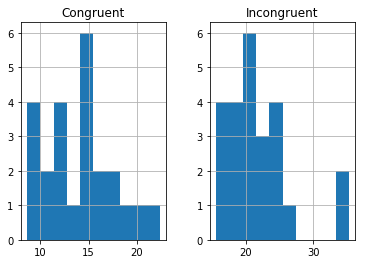

In [5]:
# Generate histogram of dataset
df.hist();

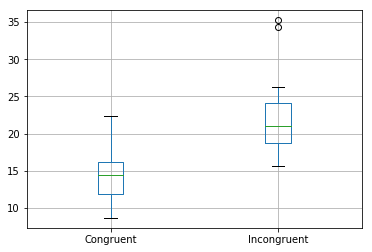

In [6]:
# Generate box plot of dataset
df.boxplot();

* The histogram shows that both the congruent and incongruent are right skewed. The box plot indicates that the congruent values have a faster response time than the incogruent values.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [7]:
# Perform OLS statistical test
df['intercept'] = 1
log_mod = sm.OLS(df['Incongruent'], df[['intercept', 'Congruent']])
results = log_mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Incongruent   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     3.108
Date:                Tue, 09 Oct 2018   Prob (F-statistic):             0.0918
Time:                        19:39:45   Log-Likelihood:                -69.590
No. Observations:                  24   AIC:                             143.2
Df Residuals:                      22   BIC:                             145.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     15.3535      3.894      3.943      0.001       7.278      23.429
Congruent      0.4742      0.269      1.763      0.092      -0.084       1.032
==============================================================================
Omnibus:                       15.513   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.580
Skew:                           1.593   Prob(JB):                     0.000414
Kurtosis:                       5.330   Cond. No.                         60.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The Ordinary Least Squares(OLS) statistical test predicts that the incongruent reponses took 15.3535 + .4742 seconds longer than congruent responses. For every second that passes an incongruent response takes .4742 seconds longer. The low p-values indicate that the results are statistically significant. Based on the result of the OLS test we can reject the null hypothesis that assumed that there is no significant difference between the congruent and incongruent groups.The results matched my expectations that were based on the significant difference in mean values of the congruent and incongruent groups.